In [1]:
import numpy as np
import matplotlib.pyplot as plt
from KMCLib import *

# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot
from KMCAnalysis_single_trajectory import *
from gradient_color_line import *

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

# -----------------------------------------------------------------------------
# KMCLib version 2.0-a1
# Distributed under the GPLv3 license
# Copyright (C)  2012-2016  Mikael Leetmaa
# Developed by Mikael Leetmaa <leetmaa@kth.se>
#
# This program is distributed in the hope that it will be useful
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# LICENSE and README files, and the source code, for details.
#
# You should have received a copy of the GNU General Public License version 3
# (GPLv3) along with this program. If not, see <http://www.gnu.org/licenses/>.
# -----------------------------------------------------------------------------



In [2]:
# Define a squared unit cell.
cell_vectors = [[   1.0000000e+00,   0.000000e+00,   0.000000e+00],
                [   0.000000e+00,   1.000000e+00,   0.000000e+00],
                [   0.000000e+00,   0.000000e+00,   1.000000e+00]]
# idk what this does
basis_points = [[   0.000000e+00,   0.000000e+00,   0.000000e+00]]
unit_cell = KMCUnitCell(cell_vectors=cell_vectors,
                        basis_points=basis_points)

In [3]:
# Define the lattice
size = 10
lattice = KMCLattice(unit_cell=unit_cell,
                     repetitions=(size,size,1),
                     periodic=(True, True, False))

In [4]:
# Size of the polymer 
polymer_size = 3
if polymer_size >= size:
    print('polymer bigger than the box')
    raise InvalideSizeError
# Generate the initial configuration array
types = ['E']*(size*size)
# index of a random non-border site
yr,xr = np.random.randint(0,size-(1+polymer_size)),np.random.randint(0,size)
for i in range(polymer_size):
    #add all the neighboring particles
        types[xr+size*(yr+i)] = 'P'+str(i)
# first particle
#types[xr+size*yr] = 'P0'
# second, neighboring one
#types[xr-1+size*yr] = 'P1'
# second, neighboring two
#types[xr-1+size*yr] = 'P2'
config = KMCConfiguration(lattice=lattice,
                          types=types,
                          possible_types=['E'].append(['P'+str(i) for i in range(polymer_size)]))
print(config._script())


# -----------------------------------------------------------------------------
# Unit cell

cell_vectors = [[   1.000000e+00,   0.000000e+00,   0.000000e+00],
                [   0.000000e+00,   1.000000e+00,   0.000000e+00],
                [   0.000000e+00,   0.000000e+00,   1.000000e+00]]

basis_points = [[   0.000000e+00,   0.000000e+00,   0.000000e+00]]

unit_cell = KMCUnitCell(
    cell_vectors=cell_vectors,
    basis_points=basis_points)

# -----------------------------------------------------------------------------
# Lattice

lattice = KMCLattice(
    unit_cell=unit_cell,
    repetitions=(10,10,1),
    periodic=(True, True, False))

# -----------------------------------------------------------------------------
# Configuration

types = ['E','E','E','P0','E','E','E','E','E','E','E','E','E',
         'P1','E','E','E','E','E','E','E','E','E','P2','E','E',
         'E','E','E','E','E','E','E','E','E','E','E','E','E',
         'E','E','E','E','E','E','E','E','E','E','E','E','E',


In [5]:
from Simple_Processes import *

interactions = KMCInteractions(processes=processes)

In [15]:
# Generate the KMC model to run.
model = KMCLatticeModel(configuration=config,
                        interactions=interactions)
control_parameters = KMCControlParameters(number_of_steps=1000,
                                          dump_interval=1,
                                          analysis_interval=1,
                                          seed=None)
# generate the analysis object
MyAnalysis = [SingleTrajectory('P1',
                              control_parameters.analysisInterval(),
                              control_parameters.numberOfSteps())]

In [16]:
model.run(control_parameters,trajectory_filename='test.py',
          trajectory_type='xyz',
          analysis = MyAnalysis,)

 KMCLib: setting up the backend C++ object.
[18]
 KMCLib: Runing for 1000 steps, starting from time: 0.000000

 KMCLib: 1 steps executed. time:     1.5520825611e-01 
 KMCLib: 2 steps executed. time:     1.9134068625e-01 
 KMCLib: 3 steps executed. time:     2.2166326202e-01 
 KMCLib: 4 steps executed. time:     8.3007474085e-01 
 KMCLib: 5 steps executed. time:     9.7719047706e-01 
 KMCLib: 6 steps executed. time:     1.4085910144e+00 
 KMCLib: 7 steps executed. time:     1.4170189556e+00 
 KMCLib: 8 steps executed. time:     2.7875264332e+00 
 KMCLib: 9 steps executed. time:     2.8126184050e+00 
 KMCLib: 10 steps executed. time:     2.8796692072e+00 
 KMCLib: 11 steps executed. time:     3.2063703888e+00 
 KMCLib: 12 steps executed. time:     3.3178904371e+00 
 KMCLib: 13 steps executed. time:     3.4142190007e+00 
 KMCLib: 14 steps executed. time:     3.7860325714e+00 
 KMCLib: 15 steps executed. time:     3.8640917181e+00 
 KMCLib: 16 steps executed. time:     4.9968125396e+00 
 K

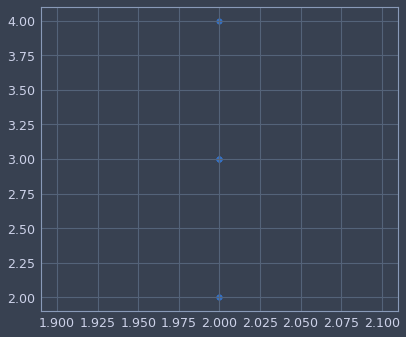

In [38]:
plt.scatter(MyAnalysis[0].results()[0][:,0], 
        MyAnalysis[0].results()[0][:,1])
#plt.scatter(MyAnalysis[0].results()[1][:,0], 
#        MyAnalysis[0].results()[1][:,1])